# Loading and organizing image data

In [1]:
import zipfile 
import os
import torch

In [2]:
cancer_subtypes = {'adenosis' : 'benign', 
                   'fibroadenoma' : 'benign',
                   'phyllodes_tumor' : 'benign',
                   'tubular_adenoma' : 'benign',
                   'ductal_carcinoma' : 'malignant',
                   'lobular_carcinoma' : 'malignant',
                   'mucinous_carcinoma' : 'malignant',
                   'papillary_carcinoma' : 'malignant'}

magnifications = ['40X', '100X', '200X', '400X']
classes = ['benign', 'malignant']

In [ ]:
# Get BreakHis Dataset also for fine-tuning as in example
import kagglehub

# Download latest version
img_root_dir = kagglehub.dataset_download("ambarish/breakhis")
img_root_dir += '/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/'

print("Path to dataset files:", img_root_dir)

In [ ]:
# organize files into desired structure
# root/[40X/100X/200X/400X]/
#    
#    benign/
#        subtype1/
#            image_zyx.png
#    malignant/
#        subtype1/
#            image_abc.png
#        subtype2/
#    ...

# Create image folders
!mkdir images/

for mag in magnifications:
    !mkdir images/{mag}
    for classification in classes:
        !mkdir images/{mag}/{classification}/
        for subtype in cancer_subtypes.keys():
            if cancer_subtypes[subtype] == classification:
                !mkdir images/{mag}/{classification}/{subtype}


In [ ]:
# Move images from kagglehub download location to local repo
imgs = []
full_paths = []

for (i, (root, dirs, files)) in enumerate(os.walk(img_root_dir)):
    img_path = 'images/'
    
    # Check magnification (check mag first, as this is the last item of path)
    mag = None
    subtype = None
    ben_mal = None
    
    
    for magnification in magnifications:
        if magnification in root:
            mag = magnification
            img_path += f'{mag}/'

            # Check benign/malignant
            for g in classes:
                if g in root:
                    ben_mal = g
                    
            # Check subtype
            for can_subtype in cancer_subtypes.keys():
                if can_subtype in root:
                    subtype = can_subtype

            # create image path
            img_sub_path = img_path + f'{ben_mal}/{subtype}'
            # print(img_sub_path)
            # Add images for each mag/subtype into the proper folder (benign or malignant)
            for file in files:
                imgs.append(file)
                full_paths.append(f'{root}/{file}')
                # move image file to correct location
                !mv {root}/{file} {img_sub_path}

In [ ]:
len(imgs)

# Loading and Organizing External Validation Dataset (PatchCamelyon)

In [2]:
# Extract images from h5 files
import h5py

# Get images/labels and convert to PyTorch tensors
with h5py.File('patch_cam/camelyonpatch_level_2_split_test_x.h5', 'r') as f:
    cam_imgs_X = torch.Tensor(f['x'][()] / 255) # scaling pixel values to be between 0 and 1

with h5py.File('patch_cam/camelyonpatch_level_2_split_test_y.h5', 'r') as f:
    cam_imgs_y = torch.Tensor(f['y'][()])


In [5]:
cam_imgs_X.shape

torch.Size([32768, 96, 96, 3])

In [3]:
cam_imgs_y = cam_imgs_y.reshape((cam_imgs_y.shape[0], 1))
cam_imgs_y.shape

torch.Size([32768, 1])

In [4]:
cam_imgs_y

tensor([[0.],
        [1.],
        [0.],
        ...,
        [1.],
        [1.],
        [0.]])

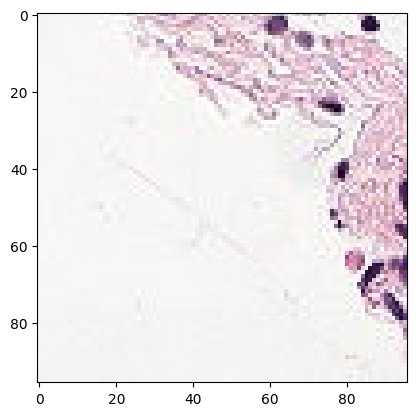

In [11]:
import matplotlib.pyplot as plt

plt.imshow(cam_imgs_X[0])

In [12]:
cam_imgs_X[0].shape

torch.Size([96, 96, 3])